In [ ]:
import pandas as pd
import numpy as np
import zipfile  # unziping 
import glob  # finding image paths
import numpy as np  # creating numpy arrays
from skimage.io import imread  # reading images
from skimage.transform import resize  # resizing images
import os
import cv2


In [ ]:
#Extractiong zip file
path = '/content/Dataset.zip'
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('Dataset')

In [ ]:
!ls
#resizing the images
size=64
names = os.listdir("/content/Dataset/Dataset/with_mask/")                                          
mask = [cv2.resize(cv2.imread("/content/Dataset/Dataset/with_mask/"+img), (size,size)) for img in names]
#print(len(mask))

Dataset  Dataset.zip  sample_data


In [ ]:
mask

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [242, 241, 241],
         [254, 254, 254],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [244, 242, 242],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [243, 242, 242],
         [253, 253, 253],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [251, 255, 255],
         [250, 255, 255],
         ...,
         [ 15,  14,  14],
         [252, 252, 252],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [251, 255, 255],
         [250, 255, 255],
         ...,
         [ 13,  12,  12],
         [252, 252, 252],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [251, 255, 255],
         [250, 255, 255],
         ...,
         [ 21,  20,  20],
  

In [ ]:
!ls
size=64
names = os.listdir("/content/Dataset/Dataset/without_mask/")                                          
nomask = [cv2.resize(cv2.imread("/content/Dataset/Dataset/without_mask/"+img), (size,size)) for img in names]
#print(len(nomask))

Dataset  Dataset.zip  sample_data


In [ ]:
nomask

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[253, 253, 253],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[190, 177, 251],
         [222, 215, 254],
         [168, 162, 233],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[154, 150, 231],
         [ 60,  56, 142],
         [134, 128, 220],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[148, 146, 231],
         [162, 156, 252],
         [ 85,  78, 183],
         ...,
         [255, 255, 255],
  

In [ ]:
# y is class label
x = np.array(mask + nomask)
y = np.array([1]*len(mask) + [0]*len(nomask))

In [ ]:
x

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [242, 241, 241],
         [254, 254, 254],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [244, 242, 242],
         [254, 254, 254],
         [254, 254, 254]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [243, 242, 242],
         [253, 253, 253],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [251, 255, 255],
         [250, 255, 255],
         ...,
         [ 15,  14,  14],
         [252, 252, 252],
         [255, 255, 255]],

        [[255, 255, 255],
         [251, 255, 255],
         [250, 255, 255],
         ...,
         [ 13,  12,  12],
         [252, 252, 252],
         [255, 255, 255]],

        [[255, 255, 255],
         [251, 255, 255],
         [250, 255, 255],
         ...,
         [ 21,  20,  20],
        

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization

In [ ]:
nsamples, nx, ny, nz = x.shape
x = x.reshape((nsamples,nx*ny*nz))

Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

KNN Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 9))
param_knn = dict(n_neighbors=k_range)
clf_knn = KNeighborsClassifier(n_neighbors=5)
grid_knn = GridSearchCV(clf_knn, param_knn, cv=5, scoring='accuracy')
grid_knn.fit(x_val, y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid_knn.best_params_)

{'n_neighbors': 5}


In [ ]:
print(grid_knn.best_score_)

0.8115300546448088


In [ ]:
from sklearn.model_selection import cross_val_score
clf_knn=grid_knn.best_estimator_
clf_knn.fit(x_train,y_train)
scores_knn = cross_val_score(clf_knn, x, y, cv = 5)
scores_knn

array([0.78476821, 0.81125828, 0.80794702, 0.81395349, 0.85049834])

In [ ]:
print(clf_knn.score(x_train,y_train))

0.8824644549763033


In [ ]:
print(clf_knn.score(x_test,y_test))

0.8145695364238411


In [ ]:
y_pred_knn= clf_knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        83
           1       0.86      0.71      0.77        68

    accuracy                           0.81       151
   macro avg       0.82      0.80      0.81       151
weighted avg       0.82      0.81      0.81       151



SVM Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'kernel': ('linear','rbf','poly'),'C': [1, 10, 100]}
clf_svm=SVC(gamma='scale')
grid_svm = GridSearchCV(clf_svm,parameters,cv=5)
grid_svm.fit(x_val,y_val)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid_svm.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [ ]:
print(grid_svm.best_score_)

0.9207103825136613


In [ ]:
clf_svm=grid_svm.best_estimator_
clf_svm.fit(x_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(clf_svm, x, y, cv = 5)
scores_svm

array([0.93377483, 0.94039735, 0.93046358, 0.93023256, 0.95348837])

In [ ]:
print(clf_svm.score(x_train,y_train))

In [ ]:
print(clf_svm.score(x_test,y_test))

0.9536423841059603


In [ ]:
y_pred_svm= clf_svm.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96        83
           1       0.96      0.94      0.95        68

    accuracy                           0.95       151
   macro avg       0.95      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151



MLP Model

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier()
param_mlp={'max_iter':(100, 500, 1000)}
grid_mlp = GridSearchCV(clf_mlp, param_mlp, n_jobs=-1, cv=5)
grid_mlp.fit(x_val, y_val) 

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [ ]:
print(grid_mlp.best_params_)

{'max_iter': 500}


In [ ]:
print(grid_mlp.best_score_)

0.6455191256830601


In [ ]:
clf_mlp=grid_mlp.best_estimator_
clf_mlp.fit(x_train,y_train)
scores_mlp = cross_val_score(clf_mlp, x, y, cv = 5)
scores_mlp

array([0.95033113, 0.5       , 0.89735099, 0.50166113, 0.95681063])

In [ ]:
print(clf_mlp.score(x_test,y_test))

0.9205298013245033


In [ ]:
print(clf_mlp.score(x_train,y_train))

0.9440758293838862


In [ ]:
y_pred_mlp= clf_mlp.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        83
           1       0.97      0.85      0.91        68

    accuracy                           0.92       151
   macro avg       0.93      0.91      0.92       151
weighted avg       0.92      0.92      0.92       151



Comparison of Model Performances


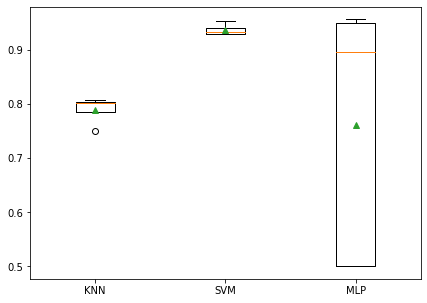

In [ ]:
from matplotlib import pyplot
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5))
res=[[0.78476821, 0.80125828, 0.80794702, 0.80395349, 0.75049834],[0.93377483, 0.94039735, 0.93046358, 0.93023256, 0.95348837],[0.95033113, 0.5, 0.89735099, 0.50166113, 0.95681063]]
name=["KNN","SVM","MLP"]
pyplot.boxplot(res,labels=name,showmeans=True)
pyplot.show()